<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/08_linear_and_polinomic_regression_con_respuestas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning:-Regresión" data-toc-modified-id="Machine-Learning:-Regresión-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine Learning: Regresión</a></span><ul class="toc-item"><li><span><a href="#Regresión-lineal-simple" data-toc-modified-id="Regresión-lineal-simple-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Regresión lineal simple</a></span><ul class="toc-item"><li><span><a href="#Scikit-learn" data-toc-modified-id="Scikit-learn-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Scikit-learn</a></span></li></ul></li><li><span><a href="#Regresión-lineal-múltiple" data-toc-modified-id="Regresión-lineal-múltiple-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regresión lineal múltiple</a></span></li><li><span><a href="#Regresión-polinomica" data-toc-modified-id="Regresión-polinomica-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Regresión polinomica</a></span></li></ul></li><li><span><a href="#Ejercicios" data-toc-modified-id="Ejercicios-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejercicios</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-1" data-toc-modified-id="Ejercicio-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ejercicio 1</a></span></li><li><span><a href="#Ejercicio-2" data-toc-modified-id="Ejercicio-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ejercicio 2</a></span></li></ul></li></ul></div>



# Machine Learning: Regresión



**¿Qué es regresión?**


Es un proceso que permite la estimación de las relaciones funcionales entre variables. En el campo de aprendizaje automático es ampliamente utilizado para la predicción del valor de una variable dependiente, a partir de una o más variables explicativas. El modelo de regresión puede ser lineal o no lineal.


**¿Qué preguntas se pueden responder mediante regresiones?**

- ¿Cómo varían el volumen de ventas cuando subimos los precios?
- ¿Afecta el nombre de un producto a su contratación?
- ¿Cuántos clientes contratarán hoy un plan de pensiones?


**¿Cuándo usar regresión lineal?**

- Cuando queremos predecir el valor de una variable a partir de otras.
- Si queremos explicar o entender la relación entre dos o más atributos.



---

## Regresión lineal simple

Los problemas de regresión tienen una estructura común: una variable respuesta ($y$) que puede ser expresada como combinación de una o más variables independientes ($x_i$), llamadas covariables o predictores. El algoritmo de regresión intenta construir un modelo que exprese la variable respuesta en función de las covariables, como:

$$y = a_1x_1 + a_2x_2 + \ldots + a_nx_n$$

donde $a_i$ son los parámetros del modelo, llamados coeficientes. El modelo se ajusta mediante Mínimos Cuadrados Ordinarios (OLS en inglés), donde los coeficientes son elegidos para minimizar el cuadrado de la distancia (vertical) entre los valores predichos y los reales.

La regresión lineal simple considera una sola variable independiente, es decir:

$$y = ax$$
*Ejemplo*. Para entender las funcionalidades de Python para regresión vamos a construir un modelo sencillo de regresión a partir de datos sintéticos usando varias librerías científicas de Python.  

Para ello vamos a generar 300 valores aleatorios de una distribución Gaussiana, los multiplicamos por unos coeficientes que les den una forma aproximadamente lineal.

In [305]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Números decimales muestreados de una distribución Normal estándar

In [306]:
datas = np.random.randn(300, 2)
weights = np.array([[0.6, .4], [.4, 0.6]])
datas = np.dot(datas, weights)

x = datas[:,0]
y = datas[:,1]

<ipython-input-307-bb3ab4332391>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, "ro", c='orange', alpha=0.3)


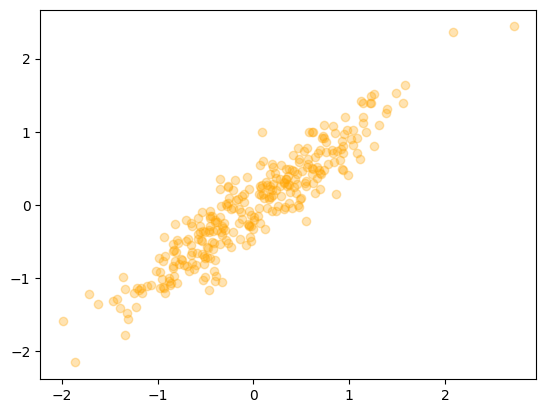

In [307]:
plt.plot(x, y, "ro", c='orange', alpha=0.3)

In [308]:
type(x)

numpy.ndarray



### Scikit-learn

Scikit-learn posee una interfaz orientada a objetos basada en el concepto de un *Estimador*

El método <code>Estimator.fit</code> establece el estado del estimador de acuerdo a los datos de entrenamiento. Usualmente estos datos están representdos por un `numpy.array` bidimensional $x$ con dimensiones <code>(n_muestras, n_predictores)</code> que contiene la matriz de características, y un `numpy.array` unidimensional que contiene los valores de la variable de respuesta $y$.

In [309]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [310]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [311]:
x.shape

(300,)

In [312]:
x = x.reshape(-1,1)

Coefficients:  -0.01365104516931767 [0.93596316]
Average error:  0.2130345925184231


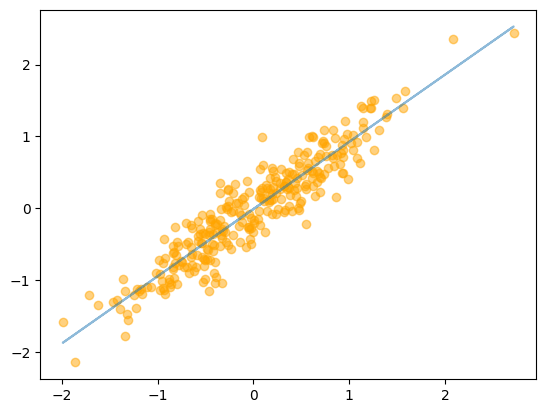

In [313]:
#regr = LinearRegression(fit_intercept=True)
regr = LinearRegression() #por defecto es true
regr.fit(x, y)
y_hat = regr.predict(x)

print('Coefficients: ', regr.intercept_, regr.coef_)
print('Average error: ', mean_absolute_error(y, y_hat))

plt.scatter(x, y, c='orange', marker='o', alpha=0.5)
plt.plot(x, y_hat, alpha=0.5)



El método ``Estimator.predict`` permite hacer predicciones. En el caso de regresión, este método devuelve los valores predichos por el modelo.

Existe también un objeto `Estimator` especial llamado `Transformer` que permite realizar transformaciones sobre los datos. En el caso de regresión, una transformación adecuada es la de normalizar los predictores, tal que tengan media cero y desviación típica 1 con ``sklearn.preprocessing.StandardScaler``



---

## Regresión lineal múltiple

Para ajustar modelo de regresión múltiple podemos usar la misma librería sklearn, solo que ahora  x no será un vector columna, sino que contendrá varias columnas.

En este ejemplo usaremos un dataset que contiene diez variables con el estado basal de cada paciente y una variable cuantitativa que mide la progresión de su enfermedad un año después.

In [314]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import datasets

In [315]:
data = datasets.load_diabetes()



Let's explore the dataset

In [316]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [317]:
diabetes_cols = ['Age', 'Sex', 'Body mass index', 'Average blood pressure',
                 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']      # S1-S6 are 6 blood-serum measurements on each patient

In [318]:
diabetes_df = pd.DataFrame(data.data, columns=diabetes_cols)
diabetes_df.head()

,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
sns.pairplot(diabetes_df)

In [ ]:
X = data.data
y = data.target

In [ ]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X,y)
y_hat = regr.predict(X)

print ('Coefficients: ',  regr.intercept_, regr.coef_)
print ('Average error: ', mean_absolute_error(y,y_hat))



En Python es algo laborioso mostrar gráficas para evaluar visualmente la calidad de una regresión.
Existe un buen tutorial de como hacerlo en el siguiente enlace:
https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

Nosotros vamos a mostrar un plot mostrando las diferencias entre el valor observado y el predicho:



Primero pasamos las *y* a DataFrame para poder generar gráficas de manera sencilla

In [ ]:
ys = pd.DataFrame({'y': y, 'y_hat': y_hat, 'err': y - y_hat, '|err|': np.abs(y - y_hat)})
ys = ys[['y', 'y_hat', 'err', '|err|']]   # rearanging columns
ys.head()



Ahora vamos a generar un gráfico con los residuales

In [ ]:
ys.plot(kind='scatter', x='y', y='err', figsize=(16,8), alpha=0.4, title='Residual Plot')
plt.plot([ys['y'].min(), ys['y'].max()], [0, 0], linewidth=2, alpha=0.5, ls='--', c='gray')



---

## Regresión polinomica

Pongamos un ejemplo. Tenemos una serie de datos que sabemos siguen una función no lineal. Le vamos aplicar varias regresiones para comprobar el ajuste.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
import pandas as pd



load the Boston housing dataset - median house values in the Boston area

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/data/Boston.csv',index_col=0)

df.head()



Vamos a mostrar un gráfico comparando las variables `lstat` (% lower status of the population) con `medv` (median value)

In [ ]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')



Otra manera de hacerlo es mediante la función `jointplot` de *Seaborn*

In [ ]:
X = df.lstat
X = X[:, np.newaxis]
print(X.shape)

y = df.medv
print(y.shape)



Vamos a ajustar el dataset con un polinomio de orden 1.

In [ ]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

pr1 = LinearRegression()
lin = PolynomialFeatures(degree=1)

X_fit1 = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X1 = lin.fit_transform(X)

pr1.fit(X1, y)

y_fit1 = pr1.predict(lin.fit_transform(X_fit1))
y_pred1 = pr1.predict(X1)

plt.plot(X_fit1, y_fit1, '--', c='orange')

print('Coefficients: ', pr1.coef_)
print('Intercept: ', pr1.intercept_)
print('Model R^2: ', r2_score(y, y_pred1))



Ahora probaremos con un polinomio de orden 2

In [ ]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

pr2 = LinearRegression()
quad = PolynomialFeatures(degree=2)

X_fit2 = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X2 = quad.fit_transform(X)

pr2.fit(X2, y)

y_fit2 = pr2.predict(quad.fit_transform(X_fit2))
y_pred2 = pr2.predict(X2)

plt.plot(X_fit2, y_fit2, '--', c='orange')

print('Coefficients: ', pr2.coef_)
print('Intercept: ', pr2.intercept_)
print('Model R^2: ', r2_score(y, y_pred2))



Y, finalmente, probaremos con un polinomio de orden 3.

In [ ]:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

pr3 = LinearRegression()
cub = PolynomialFeatures(degree=3)

X_fit3 = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X3 = cub.fit_transform(X)

pr3.fit(X3, y)

y_fit3 = pr3.predict(cub.fit_transform(X_fit3))
y_pred3 = pr3.predict(X3)

plt.plot(X_fit3, y_fit3, '--', c='orange')

print('Coefficient: ', pr3.coef_)
print('Intercept: ', pr3.intercept_)
print('Model R^2: ', r2_score(y, y_pred3))



# Ejercicios



## Ejercicio 1

Dado un conjunto de descriptores de una canción, el objetivo es predecir el año de producción de la canción. Básicamente se trata de un problema de regresión, ya que se debe predecir un número en el rango de 1922 y 2011.

Source:https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

** Descripción del dataset**

90 atributos:

- 12 = timbre average
- 78 = timbre covariance


**Instrucciones**:

Importe los datos de data/millionsong.txt

In [ ]:
# Respuesta aqui
# Respuesta

import numpy as np
import pandas as pd


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import time

# dataset = spark.read.csv(DATA_PATH+'millionsong.txt',header=None, inferSchema=True).toPandas()

# dataset.head()
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip', header=None)

#dataset = pd.read_csv(DATA_PATH+'millionsong.txt', header = None)
#dataset = df.dropna()


dataset.head()

In [ ]:
dataset.tail()



Obtenemos el target, que es la primera columna del dataset

In [ ]:
# Respuesta aqui
y = dataset.loc[:, 0].apply(lambda x: int(x))



Obtenemos el dataset con otros atributos

In [ ]:
# Respuesta aqui
x = dataset.drop(0, axis=1)


In [ ]:
# Respuesta aqui
#y = dataset.loc[:, 0].apply(lambda x: int(math.ceil(x / 10.0)) * 10)

In [ ]:
y.head()

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler()
#X_rus, y_rus= rus.fit_resample(x, y)

In [ ]:
#x=X_rus
#y=y_rus

In [ ]:
x.shape



Aquí dividimos el dataset en train y test, para entrenar y validar nuestro modelo respectivamente.

In [ ]:
# Respuesta aqui
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.3)



Vemos que las distribuciones de las predicciones se han centrado en 2000.

In [ ]:
y_train.mean()



Visualizamos el train y el test

In [ ]:
# Respuesta aqui
import seaborn as sns

sns.kdeplot(y_train, label='y_train')
sns.kdeplot(y_test, label='y_test')



Ajuste un modelo de regresión para predecir el año de una canción.

In [ ]:
# Respuesta aqui
pred = LinearRegression()
pred.fit(x_train, y_train)

y_pred = pred.predict(x_test)





Muestre las métricas y gráficas que considere necesarias para poder argumentar si el modelo está funcionando bien.

In [ ]:
# Respuesta aqui
mean_absolute_error(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
pred.coef_

In [ ]:
y_pred



Visualize los resultados de las predicciones

In [ ]:
# Respuesta aqui
sns.kdeplot(y_test, label='y_test')
sns.kdeplot(y_pred, label='y_pred')



Vemos que las distribuciones de las predicciones se han centrado en 1980.



Vamos a unir los valores de test y las predicciones en un DataFrame para poder hacer gráficos

In [ ]:
# Respuesta aqui
ys = pd.concat([pd.Series(y_test.values, name='y_test'), pd.Series(y_pred, name='y_pred')], axis=1)



Para comenzar vamos a mostrar una comparación entre las predicciones y los valores reales

In [ ]:
# Respuesta aqui
import matplotlib.pyplot as plt

ax = ys.sort_values('y_test').plot(x='y_test', y='y_pred', kind='scatter', alpha=0.4, c='steelblue',
                                   xlim=(1920, 2012), ylim=(1920, 2012), figsize=(16,8),
                                   label='y_pred', title='Predictions by year')
ys.groupby('y_test').mean().plot(y='y_pred', c='green', lw=2.5, alpha=0.7, label='Mean y_pred by year', ax=ax)
plt.plot([1921, 2010], [1921, 2010], linewidth=2, alpha=0.5, c='gray', ls='--', label='Perfect Fit')
plt.show()



Vamos a mostrar un plot con los residuos

In [ ]:
# Respuesta aqui
ys['err'] = ys['y_test'] - ys['y_pred']
ys.sort_values('y_test').plot(kind='scatter', x='y_test', y='err', figsize=(16,8), alpha=0.4, title='Residuals')
plt.plot([1921, 2010], [0, 0], linewidth=2, alpha=0.8, ls='--', c='gray')
plt.show()



Y ahora vamos a mostrar el Error absoluto en años para cada año del conjunto de test.

In [ ]:
# Respuesta aqui
ys['abs_err'] = np.abs(ys['y_test'] - ys['y_pred'])     # Absolut error
ys.sort_values('y_test').plot(kind='scatter', x='y_test', y='abs_err', figsize=(16,8), alpha=0.4)
ys.groupby('y_test').mean()['abs_err'].plot(c='orange', lw=2.5, title='Mean Absolute Error (in years) per year ')
plt.show()



---

## Ejercicio 2

EL dataset de diabetes consiste en 10 variables fisológicas (edad, sexo, peso, presión arterial, y seis pruebas sanguíneas) de 442 pacientes, y la indicación del progreso de la enfermedad después de un año.



Ajuste y compare los modelos de regresión obtenidos al considerar el primer atributo (edad) y todos los atributos del dataset.

*Source*: http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

X, y = diabetes.data, diabetes.target

In [ ]:
diabetes_cols = ['Age', 'Sex', 'Body mass index', 'Average blood pressure',
                 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']      # S1-S6 are 6 blood-serum measurements on each patient



Explore el dataset

In [ ]:
# Respuesta aqui
X.shape, y.shape

In [ ]:
diabetes_df = pd.DataFrame(X, columns=diabetes_cols)
diabetes_df['y'] = pd.Series(y)

diabetes_df.head()



Visualize la relación entre las variables

In [ ]:
# Respuesta aqui
sns.pairplot(diabetes_df)



Construya un modelo de regresion

In [ ]:
# Respuesta aqui

X1 = X[:, np.newaxis, 2]    # X1 gets only one variable: `age`
X2 = X                      # X2 gets all predictor variables

X.shape, y.shape

X1.shape, X2.shape

x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(X1, X2, y)

x1_train.shape, x1_test.shape, x2_train.shape, x2_test.shape, y_train.shape, y_test.shape

regressor1 = LinearRegression()
regressor2 = LinearRegression()

regressor1.fit(x1_train, y_train)    # Train with variable: age
regressor2.fit(x2_train, y_train)    # Train with all variables

y1_pred = regressor1.predict(x1_test)
y2_pred = regressor2.predict(x2_test)

print('First model coefficients:\n', regressor1.coef_)
print('Second model coefficients:\n', regressor2.coef_)

print('First model error:\n', mean_absolute_error(y_test, y1_pred))
print('Second model error:\n', mean_absolute_error(y_test, y2_pred))



Analiza los residuos de la regresion. Visualizelos así como las desviaciones de la predicción



Vamos a mostrar unas gráficas para entender donde falla la regresión.

Primero pasamos las *y* a DataFrame para poder generar gráficas de manera sencilla.

In [ ]:
# Respuesta aqui
# Respuesta

ys = pd.DataFrame({'y': y_test, 'ŷ1': y1_pred, 'ŷ2': y2_pred,
                    'err1': y_test - y1_pred, '|err1|': np.abs(y_test - y1_pred),
                    'err2': y_test - y2_pred, '|err2|': np.abs(y_test - y2_pred)})
ys = ys[['y', 'ŷ1', 'ŷ2', 'err1', 'err2', '|err1|', '|err2|']]   # rearanging columns
ys.head()

g = sns.PairGrid(ys, size=4,
                 x_vars=['y'], y_vars=["err1", "err2"])
g = g.map(plt.scatter, alpha=.5)
for ax in g.axes.ravel():
    ax.plot((0, 300), (0, 0), linewidth=2, alpha=0.5, ls='--', c='gray')

g = sns.PairGrid(ys, size=4, x_vars=['y'], y_vars=["|err1|", "|err2|"])
g = g.map(sns.jointplot, kind='reg', order=2, xlim=(0,350))



Vemos que los errores son mayores en valores bajos y altos de y. Una solución a este problema sería aplicar un modelo no lineal.